In [88]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
df_train_with_station_nbr = pd.read_csv("df_train_with_station_nbr_201806202007.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open("send_url.pickle", "rb"))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df = df_train_with_station_nbr.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)


In [139]:
df = df_train_with_station_nbr.copy()

In [115]:
df = pickle.load(open("preprocess_date.pkl", "rb"))

In [116]:
df.merge(df_wtr)

NameError: name 'df_wtr' is not defined

In [62]:
import datetime

def addDays(date):
    temp = date.split("-")
    year, month, date = int(temp[0]), int(temp[1]), int(temp[2])
    return datetime.datetime(year, month, date).weekday()

def changeToStr(day):
    return str(day)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
tmp = cf.isThereNoneData(df_weather, 30)

M Data over 20% : []
T Data over 20% : []
B Data over 20% : []


In [23]:
df_wt = cf.remove_m_row(df_weather)

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'codesum', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 18124


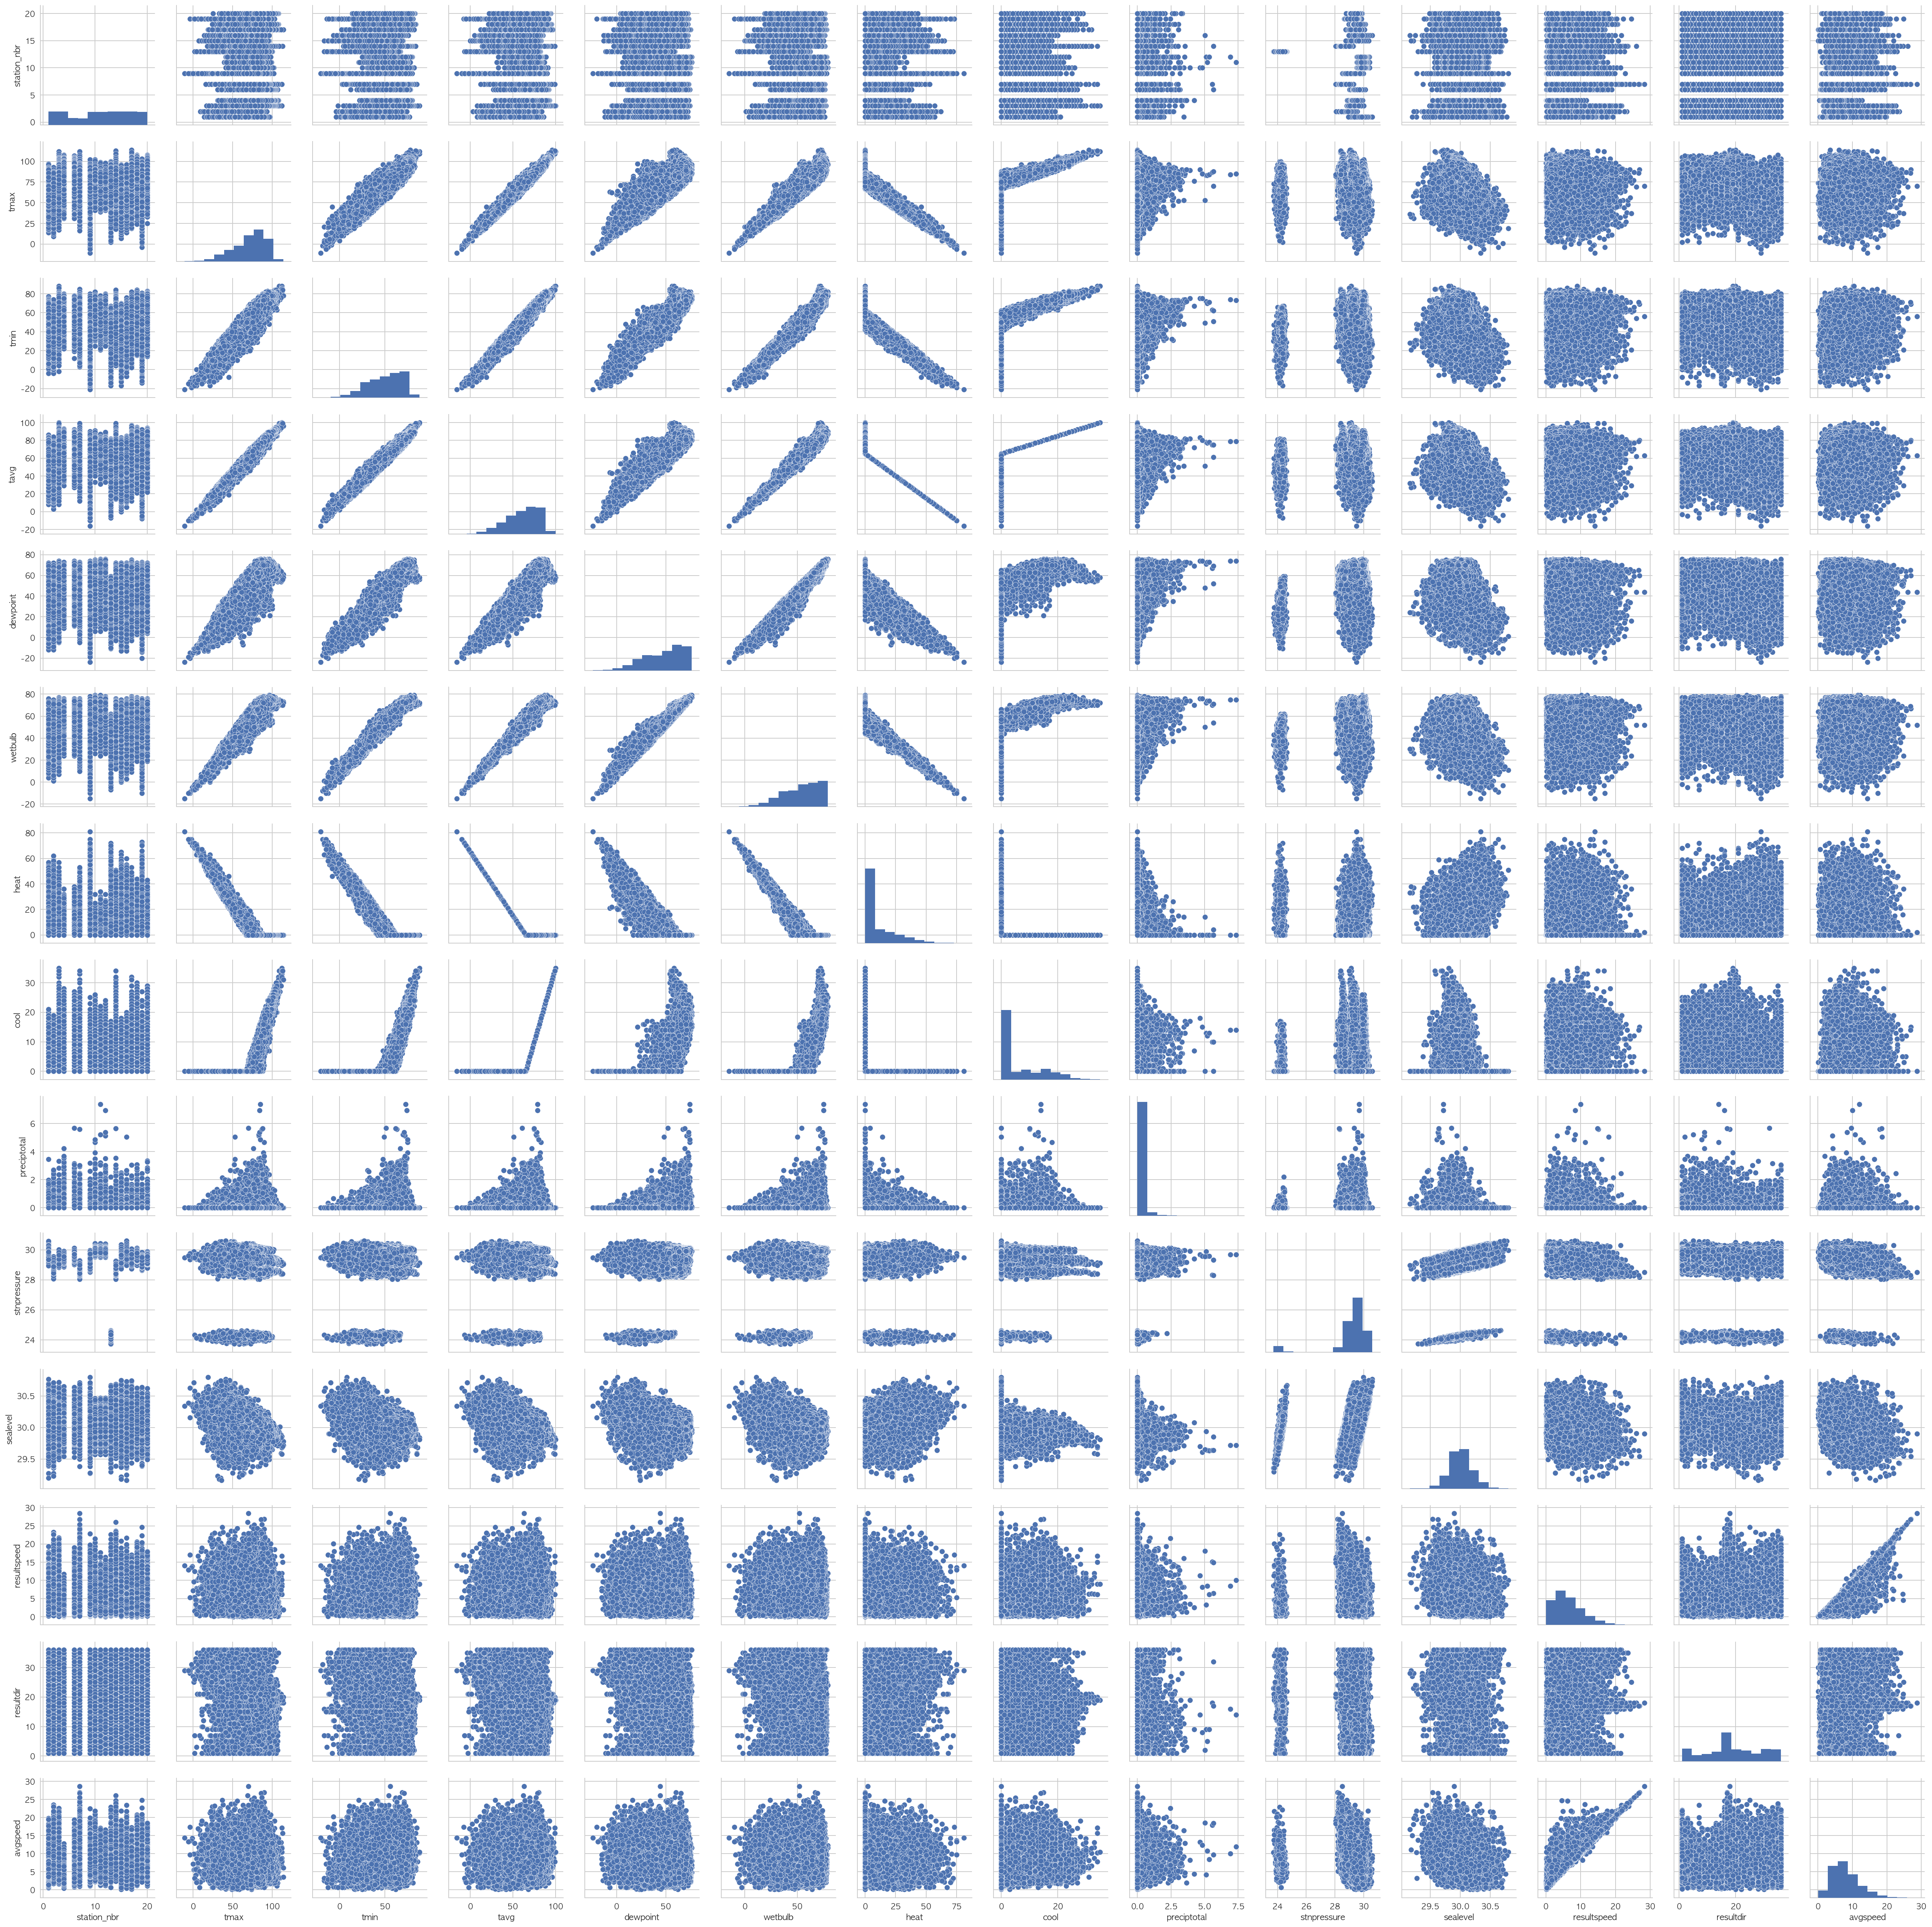

In [24]:
sns.pairplot(df_wt)
plt.show()

In [26]:
def getVif(df):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    vif = vif.sort_values("VIF Factor").reset_index(drop=True)
    return vif

In [29]:
df_wt_vif = df_wt.drop(["date", "codesum"], axis = 1)

In [45]:
df_wt_vif = df_wt.drop(["date","codesum"], axis = 1)

In [46]:
df_wt_vif.dtypes

station_nbr      int64
tmax           float64
tmin           float64
tavg           float64
dewpoint       float64
wetbulb        float64
heat           float64
cool           float64
preciptotal    float64
stnpressure    float64
sealevel       float64
resultspeed    float64
resultdir      float64
avgspeed       float64
dtype: object

In [187]:
vif_result = getVif(df_wt_vif.drop(["tavg", "tmax", "sealevel"], axis = 1))

In [188]:
vif_result

VIF Factor     features
0      1.226986  preciptotal
1      4.426991  station_nbr
2      5.193563    resultdir
3     12.961551         cool
4     24.217120  resultspeed
5     37.425680         heat
6     37.855593     avgspeed
7    260.506544     dewpoint
8    273.893716         tmin
9    549.699027  stnpressure
10  1341.126077      wetbulb

In [53]:
weather_features = list(vif_result.features)

In [121]:
weather_features

['preciptotal',
 'station_nbr',
 'resultdir',
 'cool',
 'resultspeed',
 'heat',
 'avgspeed',
 'dewpoint',
 'tmin',
 'stnpressure',
 'wetbulb']

In [117]:
df_ = df.copy()

In [118]:
print(len(df_))
df_ = df_.merge(df_wt, on=["date", "station_nbr"], how="inner")

236038


In [119]:
cf.isThereNoneData(df_)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


Column  Row Count  Missing Data  M Data %  Trace Data  \
0                 date     219767             0       0.0           0   
1            store_nbr     219767             0       0.0           0   
2             item_nbr     219767             0       0.0           0   
3                units     219767             0       0.0           0   
4                log1p     219767             0       0.0           0   
5                date2     219767             0       0.0           0   
6          station_nbr     219767             0       0.0           0   
7     preciptotal_flag     219767             0       0.0           0   
8          depart_flag     219767             0       0.0           0   
9              weekday     219767             0       0.0           0   
10          is_weekend     219767             0       0.0           0   
11          is_holiday     219767             0       0.0           0   
12  is_holiday_weekday     219767             0       0.0           0   
13  is_holiday_weekend     219767             0       0.0           0   
14                 day     219767             0       0.0           0   
15               month     219767             0       0.0           0   
16                year     219767             0       0.0           0   
17        holiday_name     219767             0       0.0           0   
18  around_BlackFriday     219767             0       0.0           0   
19                tmax     219767             0       0.0           0   
20                tmin     219767             0       0.0           0   
21                tavg     219767             0       0.0           0   
22            dewpoint     219767             0       0.0           0   
23             wetbulb     219767             0       0.0           0   
24                heat     219767             0       0.0           0   
25                cool     219767             0       0.0           0   
26             codesum     219767             0       0.0           0   
27         preciptotal     219767             0       0.0           0   
28         stnpressure     219767             0       0.0           0   
29            sealevel     219767             0       0.0           0   
30         resultspeed     219767             0       0.0           0   
31           resultdir     219767             0       0.0           0   
32            avgspeed     219767             0       0.0           0   

    T Data %  Bar Data  B Data %  
0        0.0         0       0.0  
1        0.0         0       0.0  
2        0.0         0       0.0  
3        0.0         0       0.0  
4        0.0         0       0.0  
5        0.0         0       0.0  
6        0.0         0       0.0  
7        0.0         0       0.0  
8        0.0         0       0.0  
9        0.0         0       0.0  
10       0.0         0       0.0  
11       0.0         0       0.0  
12       0.0         0       0.0  
13       0.0         0       0.0  
14       0.0         0       0.0  
15       0.0         0       0.0  
16       0.0         0       0.0  
17       0.0         0       0.0  
18       0.0         0       0.0  
19       0.0         0       0.0  
20       0.0         0       0.0  
21       0.0         0       0.0  
22       0.0         0       0.0  
23       0.0         0       0.0  
24       0.0         0       0.0  
25       0.0         0       0.0  
26       0.0         0       0.0  
27       0.0         0       0.0  
28       0.0         0       0.0  
29       0.0         0       0.0  
30       0.0         0       0.0  
31       0.0         0       0.0  
32       0.0         0       0.0

In [65]:
def getFormula(df, categorical_columns, target_column):
    """
        df : 회귀분석할 df
        categorical_columns : 카테고리 컬럼명 리스트
        target_column : target column명 문자열
    """
    columns = df.columns
    formula = target_column + " ~ "
    for i, column in enumerate(columns):
        if column != target_column:
            if i != 0:
                formula += " + "
            if column in categorical_columns:
                formula += "C(" + column + ")"
            else:
                formula += str(column)
    return formula

In [120]:
df_.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday', 'tmax',
       'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'codesum',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed'],
      dtype='object')

In [122]:
cf.remove_columns(df_, ["date", "date2", "store_nbr", "item_nbr", "station_nbr",\
                        "tmax", "tavg", "sealevel"])

제거한 컬럼명 : ['date', 'date2', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tavg', 'sealevel']


units     log1p  preciptotal_flag  depart_flag  weekday  is_weekend  \
219762     24  3.218876               0.0          0.0        3           0   
219763      0  0.000000               0.0          0.0        4           0   
219764     29  3.401197               0.0          0.0        4           0   
219765      2  1.098612               0.0          0.0        4           0   
219766     23  3.178054               0.0          0.0        4           0   

        is_holiday  is_holiday_weekday  is_holiday_weekend  day   ...     \
219762           0                   0                   0   30   ...      
219763           1                   1                   0   31   ...      
219764           1                   1                   0   31   ...      
219765           1                   1                   0   31   ...      
219766           1                   1                   0   31   ...      

        dewpoint  wetbulb heat cool  codesum  preciptotal  stnpressure  \
219762      51.0     58.0  0.0  3.0       RA          0.0        29.60   
219763      40.0     50.0  7.0  0.0                   0.0        29.78   
219764      40.0     50.0  7.0  0.0                   0.0        29.78   
219765      40.0     50.0  7.0  0.0                   0.0        29.78   
219766      40.0     50.0  7.0  0.0                   0.0        29.78   

        resultspeed  resultdir avgspeed  
219762          2.9       14.0      5.6  
219763         10.6       36.0     11.2  
219764         10.6       36.0     11.2  
219765         10.6       36.0     11.2  
219766         10.6       36.0     11.2  

[5 rows x 25 columns]

In [123]:
models = sm.OLS.from_formula(getFormula(df_, ["around_BlackFriday", "holiday_name"], "units"), data=df_)

In [124]:
result = models.fit()

In [125]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     858.3
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:37:15   Log-Likelihood:            -1.0215e+06
No. Observations:              219767   AIC:                         2.044e+06
Df Residuals:                  219373   BIC:                         2.048e+06
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [126]:
df_1 = df_.drop("codesum", axis =1)

In [134]:
df_1["around_BlackFriday"].unique()

array(['Else', 'BlackFridayM3', 'BlackFridayM2', 'ThanksgivingDay',
       'BlackFriday', 'BlackFriday1', 'BlackFriday2', 'BlackFriday3'],
      dtype=object)

In [127]:
models = sm.OLS.from_formula(getFormula(df_1, ["around_BlackFriday", "holiday_name"], "units"), data=df_1)

In [128]:
result = models.fit()

In [132]:
df_1["log1p"].sum()

329972.00761851465

In [133]:
len(df_1)

219767

In [130]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     8008.
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:38:49   Log-Likelihood:            -1.0218e+06
No. Observations:              219767   AIC:                         2.044e+06
Df Residuals:                  219724   BIC:                         2.044e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [183]:
import re
with open('holiday_names.txt') as file:  
    data = file.readlines()
#     tmp = file.readlines()
    holidays = []
    BF = []
    months = ["", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for holiday in data:
        if re.findall("BlackFriday", holiday) != []:
            BF.append(holiday.split(" ")[:3])
        else:
            holidays.append(holiday.split(" ")[:3])
    for i in range(len(holidays)): 
        month_idx = months.index(holidays[i][1])
        if month_idx < 10:
            holidays[i][1] = "0" + str(month_idx)
        else:
            holidays[i][1] = str(month_idx)
    for z in range(len(holidays)): 
        if len(holidays[z][2]) == 1: 
            holidays[z][2] = "0" + holidays[z][2]
    for z in range(len(BF)) :
        BF[z][1] = "11"

In [184]:
# holiday 구분하기 
def isholiday(dt): 
    if dt.split("-") in BF :
        return "black friday"
    elif dt.split("-") in holidays :
        return "holiday"
    else :
        return "regular day"

In [185]:
df = df_train_with_station_nbr.copy()

In [186]:
df['holiday'] = df['date'].apply(isholiday)

In [143]:
len(df_wt)

18124

In [157]:
df = df.merge(df_wt, on=["date", "station_nbr"], how="inner")

In [158]:
df.tail()

date  store_nbr  item_nbr  units  station_nbr  holiday  tmax  \
4305907  2014-10-31         36       107      0           18  holiday  67.0   
4305908  2014-10-31         36       108      0           18  holiday  67.0   
4305909  2014-10-31         36       109      0           18  holiday  67.0   
4305910  2014-10-31         36       110      0           18  holiday  67.0   
4305911  2014-10-31         36       111      0           18  holiday  67.0   

         tmin  tavg  dewpoint  wetbulb  heat  cool codesum  preciptotal  \
4305907  49.0  58.0      40.0     50.0   7.0   0.0                  0.0   
4305908  49.0  58.0      40.0     50.0   7.0   0.0                  0.0   
4305909  49.0  58.0      40.0     50.0   7.0   0.0                  0.0   
4305910  49.0  58.0      40.0     50.0   7.0   0.0                  0.0   
4305911  49.0  58.0      40.0     50.0   7.0   0.0                  0.0   

         stnpressure  sealevel  resultspeed  resultdir  avgspeed  
4305907        29.78     30.28         10.6       36.0      11.2  
4305908        29.78     30.28         10.6       36.0      11.2  
4305909        29.78     30.28         10.6       36.0      11.2  
4305910        29.78     30.28         10.6       36.0      11.2  
4305911        29.78     30.28         10.6       36.0      11.2

In [159]:
cf.remove_columns(df, ["date", "store_nbr", "item_nbr", "station_nbr", "codesum",\
                        "tmax", "tavg", "sealevel"])

제거한 컬럼명 : ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'codesum', 'tmax', 'tavg', 'sealevel']


units  holiday  tmin  dewpoint  wetbulb  heat  cool  preciptotal  \
4305907      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305908      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305909      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305910      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305911      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   

         stnpressure  resultspeed  resultdir  avgspeed  
4305907        29.78         10.6       36.0      11.2  
4305908        29.78         10.6       36.0      11.2  
4305909        29.78         10.6       36.0      11.2  
4305910        29.78         10.6       36.0      11.2  
4305911        29.78         10.6       36.0      11.2

In [160]:
df.tail()

units  holiday  tmin  dewpoint  wetbulb  heat  cool  preciptotal  \
4305907      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305908      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305909      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305910      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   
4305911      0  holiday  49.0      40.0     50.0   7.0   0.0          0.0   

         stnpressure  resultspeed  resultdir  avgspeed  
4305907        29.78         10.6       36.0      11.2  
4305908        29.78         10.6       36.0      11.2  
4305909        29.78         10.6       36.0      11.2  
4305910        29.78         10.6       36.0      11.2  
4305911        29.78         10.6       36.0      11.2

In [165]:
models = sm.OLS.from_formula(getFormula(df, ["holiday"], "units") + " + 0", data=df)

In [166]:
result = models.fit()

In [167]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     99.41
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.22e-248
Time:                        20:58:53   Log-Likelihood:            -1.6068e+07
No. Observations:             4305912   AIC:                         3.214e+07
Df Residuals:                 4305899   BIC:                         3.214e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(holiday)[black friday]